In [50]:
# https://towardsdatascience.com/pandas-groupby-a-simple-but-detailed-tutorial-314b8f37005d
# https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d
# https://towardsdatascience.com/summarizing-data-with-pandas-crosstab-efc8b9abecf
# https://towardsdatascience.com/how-to-flatten-multiindex-columns-and-rows-in-pandas-f5406c50e569
# https://datascientyst.com/list-aggregation-functions-aggfunc-groupby-pandas/
# https://stackoverflow.com/questions/25929319/how-to-iterate-over-pandas-multiindex-dataframe-using-index
# https://stackoverflow.com/questions/24495695/pandas-get-unique-multiindex-level-values-by-label
# https://stackoverflow.com/questions/55706391/pandas-crosstab-on-multiple-columns-then-groupby

# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

In [ ]:
# # +++++++++ GROUPBY +++++++++ 
# df_f1 = df_f.groupby(['Date']).agg({'Date':['nunique'], 'Gross Sales':['sum']})
# df_f1.columns = df_f1.columns.droplevel(1)
# df_f1

# # +++++++++ FILTER +++++++++ selecting rows based on condition 
# df_f = df[(df['DOW'] == 4) & (df['TAVG'] > 60) & (df['TAVG'] < 65)] 
# df_f.head(1)

# +++++++++ GROUP DATES by WEEK +++++++++
# https://www.statology.org/pandas-group-by-week/
# https://stackoverflow.com/questions/45281297/group-by-week-in-pandas
# #convert date column to datetime and subtract one week
# df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
# #calculate sum of values, grouped by week
# df.groupby([pd.Grouper(key='date', freq='W')])['sales'].sum()

In [51]:
import sys
import pandas as pd
sys.path.append("C:/Users/ping/MyDrive/py_files/python/py379/")
from myUtils import pickle_load, pickle_dump
pd.set_option('max_colwidth', 12, 'display.max_columns', 18, 'display.width', 1200, 'display.max_rows', 100)
INPUT_DIR = 'C:/Users/ping/OneDrive/Documents/jenn_bb_sales'
path_pickle_dump = f'{INPUT_DIR}/'

In [52]:
df = pickle_load(path_pickle_dump, 'df_item_sale_n_weather_cleaned')
rows_org, cols_org = df.shape[0], df.shape[1]
print(f'df.shape: {df.shape}, rows: {rows_org}, columns: {cols_org}')
print(f'df.columns: {df.columns}')

df.shape: (18007, 23), rows: 18007, columns: 23
df.columns: Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT08', 'DOW'], dtype='object')


In [53]:
ls_Date = df.Date.to_list()
Date_first, Date_last = ls_Date[0], ls_Date[-1]
print(f'first date: {Date_first}, last date: {Date_last}')
date_str = f' ({Date_first} to {Date_last})'
print(f'date_str: {date_str}')

first date: 2021-07-08, last date: 2022-09-04
date_str:  (2021-07-08 to 2022-09-04)


In [54]:
l_object, l_float, l_int64, l_error = [], [], [], []
for column in df.columns:
  if df[column].dtype == 'object':
    l_object.append(column)
  elif df[column].dtype == 'float':
    l_float.append(column)  
  elif df[column].dtype == 'int64':
    l_int64.append(column)
  else:   
    l_error.append(column)
print(f'columns with dtypes are object:\n{l_object}')
print(f'columns with dtypes are float:\n{l_float}')
print(f'columns with dtypes are int64:\n{l_int64}')
print(f'columns with dtypes are non of the above:\n{l_error}')

columns with dtypes are object:
['Date', 'Time', 'Category', 'Item', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME']
columns with dtypes are float:
['Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'AWND', 'PRCP', 'TAVG', 'WT01', 'WT02', 'WT08']
columns with dtypes are int64:
['TMAX', 'TMIN', 'DOW']
columns with dtypes are non of the above:
[]


In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

_figsize = (4,3)  # (width, height)
_fontsize = 6
_titlescale = 1.1  # scale title text
_grid = True  # default False
# _scale = 1

plt.rc('font', size=_fontsize) #controls default text size
plt.rc('axes', titlesize=_fontsize*_titlescale) #fontsize of the title
plt.rc('axes', labelsize=_fontsize) #fontsize of the x and y labels
plt.rc('xtick', labelsize=_fontsize) #fontsize of the x tick labels
plt.rc('ytick', labelsize=_fontsize) #fontsize of the y tick labels
plt.rc('legend', fontsize=_fontsize) #fontsize of the legend

day-of-week   days   total sales   avg. sales
Sun             41        33,257          811
Mon              7         1,935          276
Tue              4           717          179
Wed              6           796          133
Thu             21         4,260          203
Fri             54        35,728          662
Sat             53        54,220        1,023


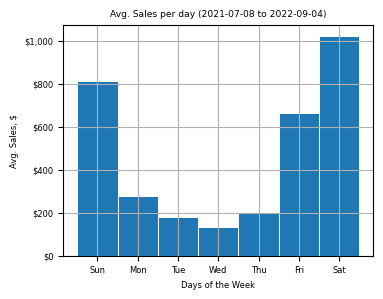

In [77]:
# Bar Graph, Avg. Gross Sales per day
_df = df.groupby(['DOW', 'Date']).agg('sum')
_l_day_of_week, _l_avg_gross_sales_per_day = [], []
_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'day-of-week   days   total sales   avg. sales')
for DOW, _df_new in _df.groupby(level=0):
  _n_days = len(_df_new)
  _sum_gross_sales = _df_new['Gross Sales'].sum()
  _avg_gross_sales = _sum_gross_sales / _n_days
  # print(f'Day of Week: {DOW},   Avg Gross Sales per day: {_avg_gross_sales:>6,.0f}')
  _l_day_of_week.append(DOW)
  _l_avg_gross_sales_per_day.append(_avg_gross_sales)
  print(f'{_dict_DOW[DOW]:<11}{_n_days:>7}{_sum_gross_sales:>14,.0f}{_avg_gross_sales:>13,.0f}')

_xlabel = 'Days of the Week'
_ylabel = 'Avg. Sales' + ', $'
_title = 'Avg. Sales per day' + date_str

# data
x = _l_day_of_week
y = _l_avg_gross_sales_per_day

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.show()

day-of-week   total sales
Sun                33,257
Mon                 1,935
Tue                   717
Wed                   796
Thu                 4,260
Fri                35,728
Sat                54,220


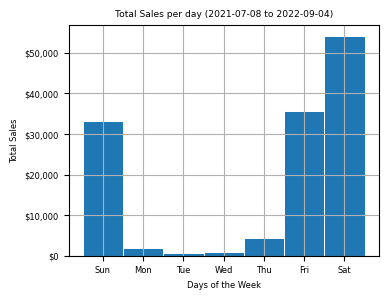

In [57]:
# Bar Graph, Gross Sales by days-of_week
_groupby_col, _agg_col = 'DOW', 'Gross Sales'
_agg_func = 'sum'
_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

_xlabel = 'Days of the Week'
_ylabel = 'Total Sales'
_title = 'Total Sales per day' + date_str

# data
x = _df.index
y = _df[_agg_col].values  # array([[33628.5], [ 1935. ], ..., [55169. ]])
y = list(np.concatenate(y).flat)  # [33628.5, 1935.0, 717.0, 795.5, 4500.0, 36615.5, 55169.0]

_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'day-of-week   total sales')
for i in x:
  print(f'{_dict_DOW[i]:<14}{y[i]:>11,.0f}')

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.show()


Total Sales:                   130,912
Total Transaction:               6,793
Avg. Sales per Transaction:      19.27



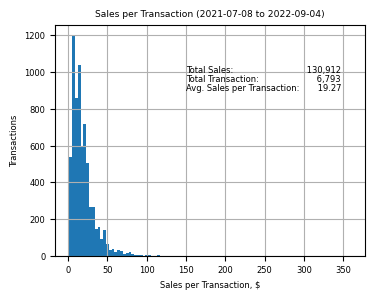

In [58]:
# Histogram, Gross Sales per Transaction
_groupby_col, _agg_col = 'Transaction ID', 'Gross Sales'
_agg_func = 'sum'

_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

Total_Gross_Sales = _df['Gross Sales'].sum()[0]  # get the first element in series
Total_Trans = len(_df)
Total_Trans
Avg_Sales_per_Trans = Total_Gross_Sales / Total_Trans

plt_text = \
f'''
Total Sales:                {Total_Gross_Sales:10,.0f}
Total Transaction:          {Total_Trans:10,}
Avg. Sales per Transaction: {Avg_Sales_per_Trans:10,.2f}
'''
print(plt_text)

_x = _df[_agg_col]
_bins = 100
_xlabel = 'Sales per Transaction, $'
_ylabel = 'Transactions'
_title = 'Sales per Transaction' + date_str
_density = False  # False => count, True => Area = 1 
n, bins, patches = plt.hist(_x, _bins, density=_density)
# plt.rcParams.update({'font.size': _fontsize})
plt.rcParams["figure.figsize"] = _figsize
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
plt.text(150, 1000, f'Total Sales:                         {Total_Gross_Sales:>10,.0f}')
plt.text(150, 950,  f'Total Transaction:                 {Total_Trans:>10,}')
plt.text(150, 900,  f'Avg. Sales per Transaction:  {Avg_Sales_per_Trans:>10,.2f}')
plt.grid(_grid)
plt.show()

In [80]:
range(2)

range(0, 23)

Hour    Transactions    Total Sales    Avg. Sales per Hr.
0                  3            172                  57
1                  1             45                  45
5                  1             32                  32
6                  3            116                  39
7                  3            102                  34
8                 28          1,005                  36
9                151         53,363                 353
10               158         37,261                 236
11               148         21,212                 143
12               125         10,568                  85
13                54          2,105                  39
14                12            421                  35
15                 7            337                  48
16                 8            256                  32
17                 6            493                  82
18                 6            381                  64
19                 8            710           

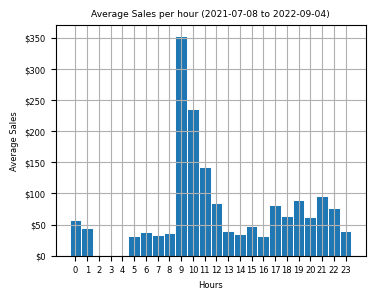

In [82]:
_df = df.sort_values(by=['Time', 'Date'])
_df.Time = pd.to_datetime(_df.Time)
_df = _df.groupby([_df['Time'].dt.hour, 'Date']).agg(sum)

print('Hour    Transactions    Total Sales    Avg. Sales per Hr.')
_l_hr = []
_l_trans = []
_l_sales = []
_l_avg_sale = []
for Time, _df1 in _df.groupby(level=0):
  _hour = Time
  _transactions = len(_df1)
  _total_sales = _df1["Gross Sales"].agg(sum)
  _avg_sales_per_hr = _total_sales / _transactions
  _l_hr.append(_hour)
  _l_trans.append(_transactions)
  _l_sales.append(_total_sales)
  _l_avg_sale.append(_avg_sales_per_hr)
  print(f'{Time:<4}    {_transactions:>12,.0f}    {_total_sales:>11,.0f}    {_avg_sales_per_hr:>16,.0f}')

_xlabel = 'Hours'
_ylabel = 'Average Sales'
_title = 'Average Sales per hour' + date_str
# data
x = _l_hr
y = _l_avg_sale
# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
ax.set_xticks(range(24))
plt.rcParams["figure.figsize"] = _figsize
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.show()

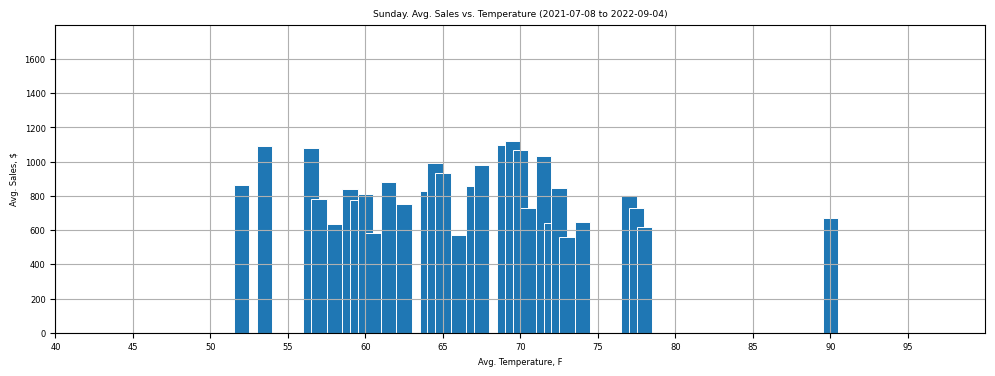

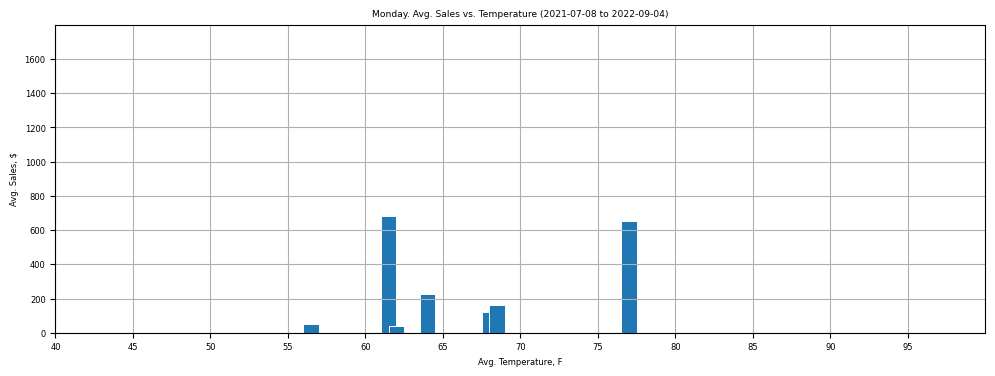

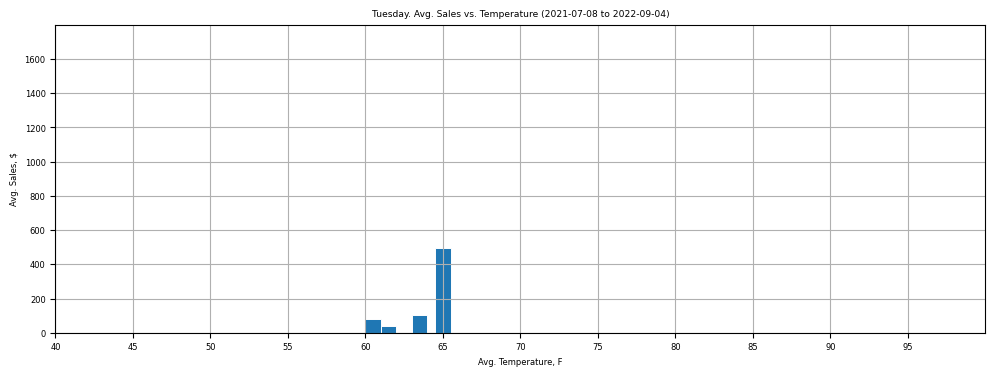

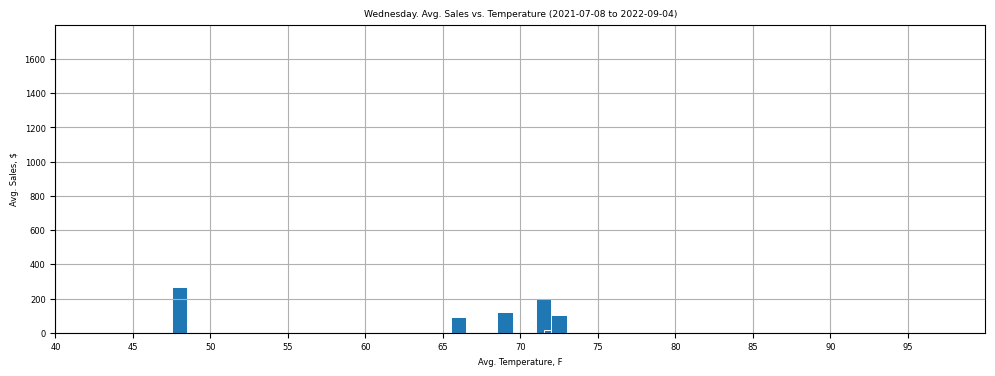

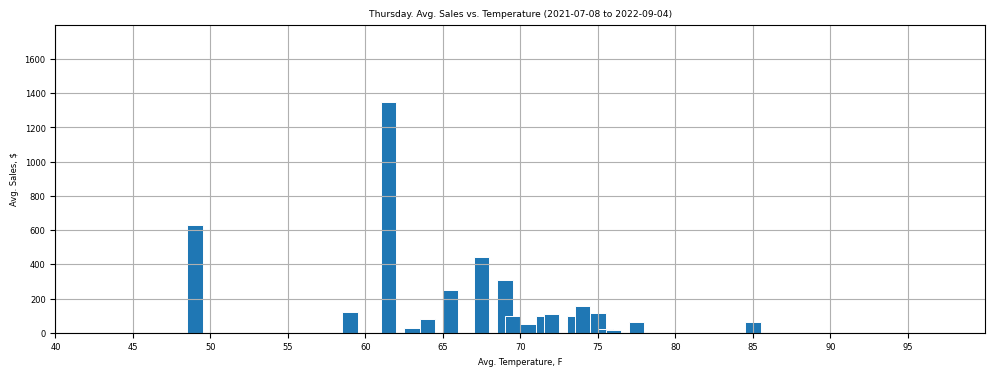

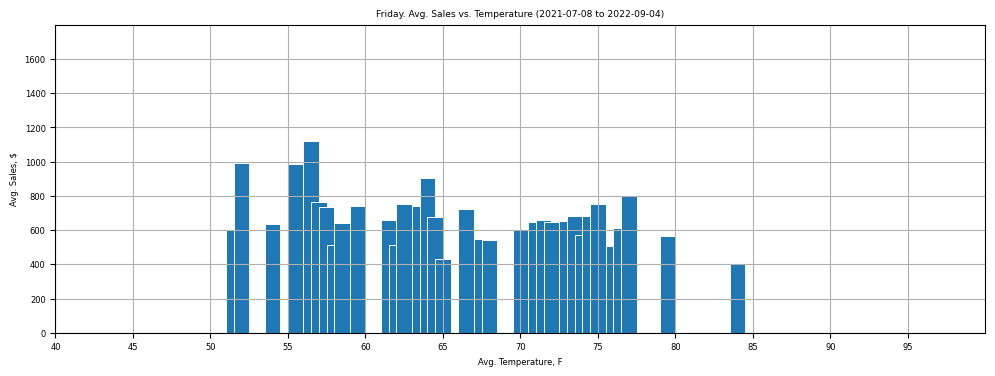

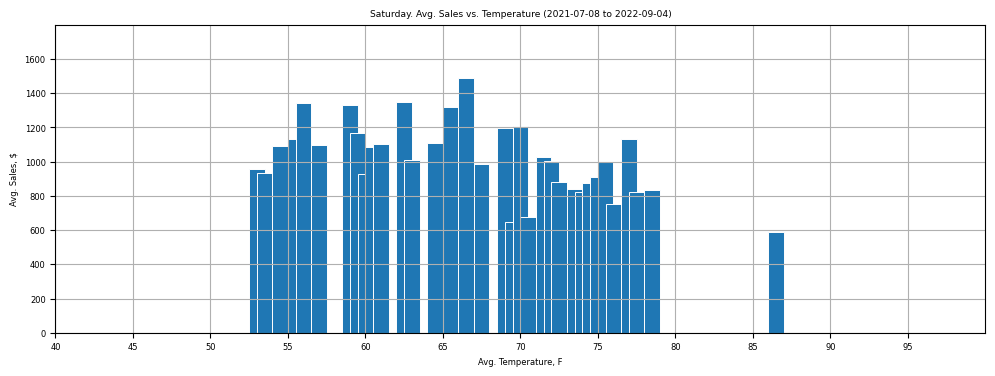

In [84]:
df1 = df[['DOW', 'TAVG', 'Date', 'Gross Sales']]
df2 = df1.groupby(['DOW', 'TAVG']).agg({'Date':['nunique'], 'Gross Sales':['sum']})
l_sales = df2.loc[(slice(None), 'Gross Sales')].values
l_date = df2.loc[(slice(None), 'Date')].values
l_sales.flatten()
l_date.flatten()
l_sales_per_day = l_sales / l_date
df2['Avg Sales'] = l_sales_per_day
df2.columns = df2.columns.droplevel(1)
df2 = df2.rename({'Date': 'Unique Date'}, axis=1)
df2 = df2[['Avg Sales']]
df2 = df2.reset_index()
ct = pd.crosstab(
        df2['DOW'], 
        df2['TAVG'], 
        values = df2['Avg Sales'],
        aggfunc = 'mean'
    ).round(0)
ct  # crosstab of days-of-week vs avg.-temp.

# Bar Graph, Gross Sales by days-of_week
for _DOW in ct.index:
  temp = ct.loc[_DOW].index
  avg_sales = np.nan_to_num(ct.loc[_DOW].values, copy=True, nan=0.0, posinf=None, neginf=None)
  _dict_DOW = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

  _xlabel = 'Avg. Temperature, F'
  _ylabel = f'Avg. Sales, $'
  _title = f'{_dict_DOW[_DOW]}. Avg. Sales vs. Temperature' + date_str

  # data
  x = temp
  y = avg_sales

  # plot
  fig, ax = plt.subplots()
  ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
  ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
         ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
  plt.xlabel(_xlabel)
  plt.ylabel(_ylabel)
  plt.title(_title, fontsize = _fontsize*_titlescale)
  plt.rcParams["figure.figsize"] = (12, 4)
  plt.grid(True)
  plt.show()

In [85]:
# ********** FILTER ********** selecting rows based on condition 
df_f = df[(df['DOW'] == 4) & (df['TAVG'] > 60) & (df['TAVG'] < 65)] 
df_f.head(1)

,Date,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,Tax,...,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT08,DOW
5236,2021-11-04,14:01:02,Food,Pumpkin ...,1.0,40.0,0.0,40.0,3.8,...,0.89,0.0,64.0,71,57,1.0,1.0,1.0,4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2021-07-08 to 2022-09-04
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gross Sales  186 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
            Gross Sales
Date                   
2021-07-08         15.0
2021-07-09        805.0
2021-07-10       1131.0
2021-07-16        827.0
2021-07-17        998.0
            Gross Sales
Date                   
2022-08-21        886.0
2022-09-01         64.0
2022-09-02        400.0
2022-09-03        589.0
2022-09-04        668.0


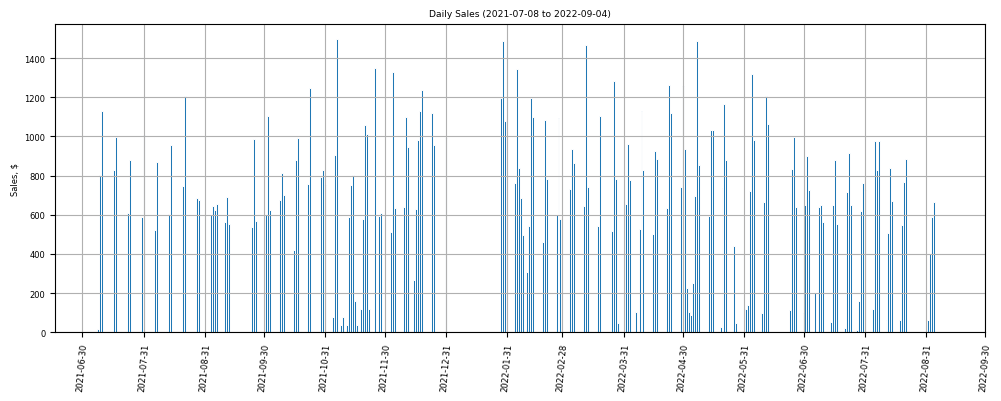

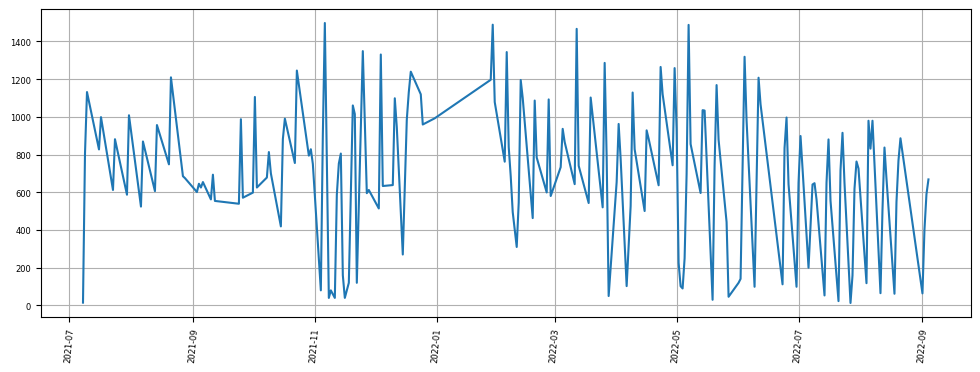

In [102]:
df_d = df[['Date', 'Gross Sales']]
df_d = df_d.groupby(['Date']).agg({'Gross Sales':['sum']})
df_d.tail()
df_d.columns = df_d.columns.droplevel(1)
df_d.tail()
# Converting the index as date
df_d.index = pd.to_datetime(df_d.index)
df_d.info()
print(df_d.head())
print(df_d.tail())

_xlabel = ''
_ylabel = f'Sales, $'
_title = f'Daily Sales' + date_str

# data
x = df_d.index
y = df_d['Gross Sales']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
ax.set_xticks(x_tick)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.show()

_ylabel = f'Sales, $'
_title = f'Daily Sales' + date_str
x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
ax.set_xticks(x_tick)
plt.xticks(rotation = 85)
plt.plot(x, y)
plt.grid(True)
plt.show()

In [103]:
df_item = df[['Item', 'Date', 'Qty', 'Gross Sales']]
df_item
df_item_g = df_item.groupby(['Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_item_g
df_item_g.columns = df_item_g.columns.droplevel(1)
df_item_g = df_item_g.sort_values(by = ['Gross Sales'], ascending=False)
df_item_g = df_item_g.head(15)
df_item_g['Avg_Sales_per_day'] = df_item_g['Gross Sales'] / df_item_g['Date'] 
df_item_g['Avg_Qty_per_day'] = df_item_g['Qty'] / df_item_g['Date'] 
# df_item_g = df_item_g.sort_values(by = ['Avg_Sales_per_day'], ascending=False)
df_item_g

,Date,Qty,Gross Sales,Avg_Sales_per_day,Avg_Qty_per_day
Item,,,,,
Danish,146,4618.0,30605.0,209.623288,31.630137
Chocolate Croissant,163,3133.0,20749.0,127.294479,19.220859
Croissant,164,2709.0,15210.0,92.743902,16.518293
Chocolate Chip Cookie,160,2072.0,8736.0,54.600000,12.950000
Double Chocolate Cookie,153,1441.0,6014.0,39.307190,9.418301
Cinnamon Knot,153,1971.0,5593.0,36.555556,12.882353
Twice Baked,105,804.0,5504.0,52.419048,7.657143
Jarred Pastry,133,706.0,4468.0,33.593985,5.308271
Furikake Crx,77,574.0,4018.0,52.181818,7.454545


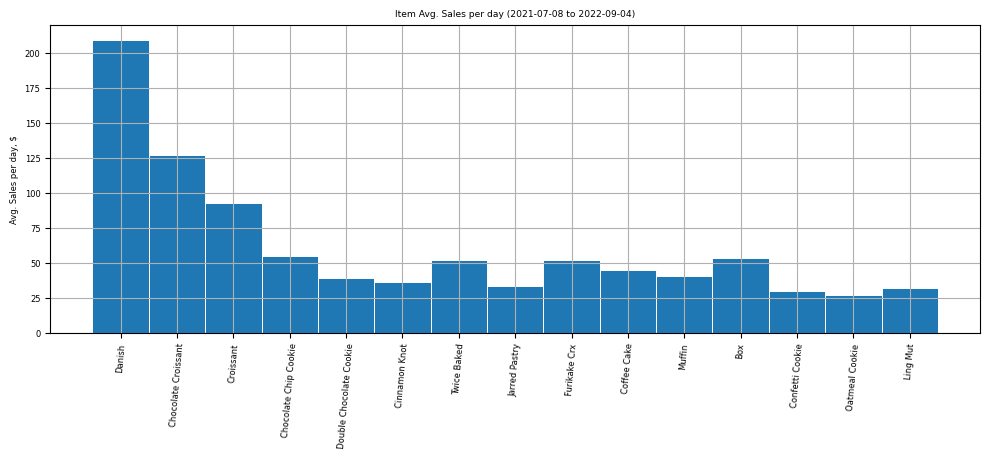

In [71]:
_xlabel = ''
_ylabel = f'Avg. Sales per day, $'
_title = f'Item Avg. Sales per day' + date_str

# data
x = df_item_g.index
y = df_item_g['Avg_Sales_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
#        ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.show()

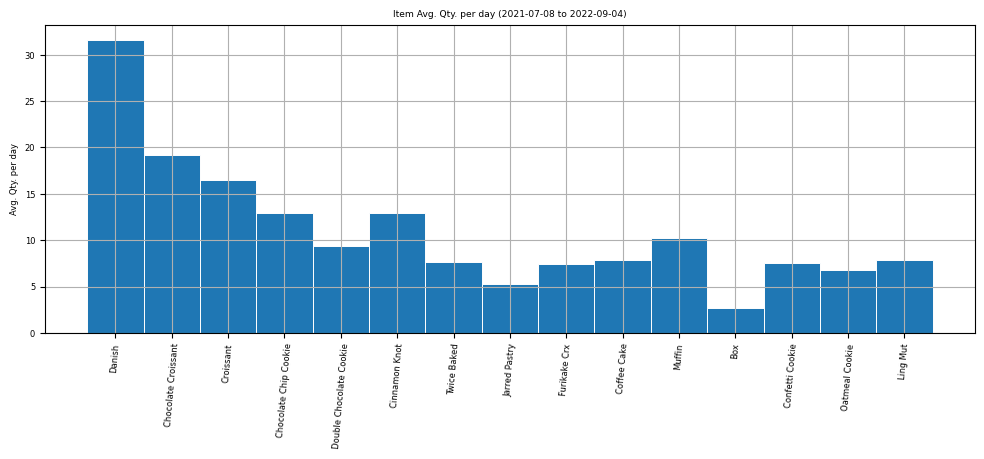

In [72]:
_xlabel = ''
_ylabel = f'Avg. Qty. per day'
_title = f'Item Avg. Qty. per day' + date_str

# data
x = df_item_g.index
y = df_item_g['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
#        ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)


# x_tick = ax.xaxis.set_major_locator(x.MonthLocator(interval=1))
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# ax.set_xticks(x_tick)
plt.xticks(rotation = 85)

# ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = (12, 4)

# plt.xlim(50, 90)
plt.grid(True)
plt.show()

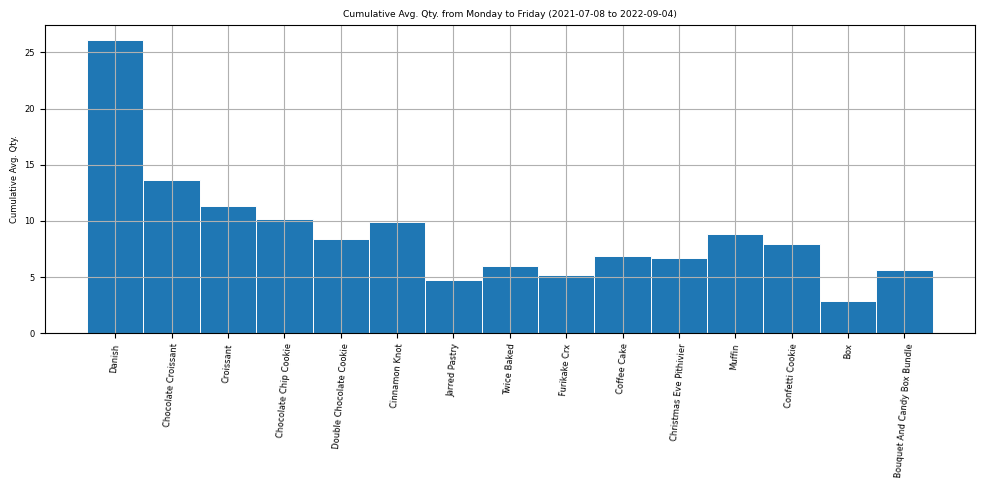

In [73]:
df_dow = df[['DOW', 'Item', 'Date', 'Qty', 'Gross Sales']]
df_dow
df_dow_g = df_dow.groupby(['DOW', 'Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_1_5 =df_dow_g.loc[1:5]
df_1_5
df_1_5.columns = df_1_5.columns.droplevel(1)  # drop sum in column index
df_1_5.index = df_1_5.index.droplevel(0)  # drop DOW in row index
df_1_5 = df_1_5.groupby(['Item']).agg({'Date':['sum'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_1_5.columns = df_1_5.columns.droplevel(1)  # drop sum in column index
df_1_5['Avg_Sales_per_day'] = df_1_5['Gross Sales'] / df_1_5['Date'] 
df_1_5['Avg_Qty_per_day'] = df_1_5['Qty'] / df_1_5['Date'] 
df_1_5 = df_1_5.sort_values(by=['Gross Sales'], ascending=False)
df_1_5 = df_1_5.head(15)
df_1_5

_xlabel = ''
_ylabel = f'Cumulative Avg. Qty.'
_title = f'Cumulative Avg. Qty. from Monday to Friday' + date_str

# data
x = df_1_5.index
y = df_1_5['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.show()

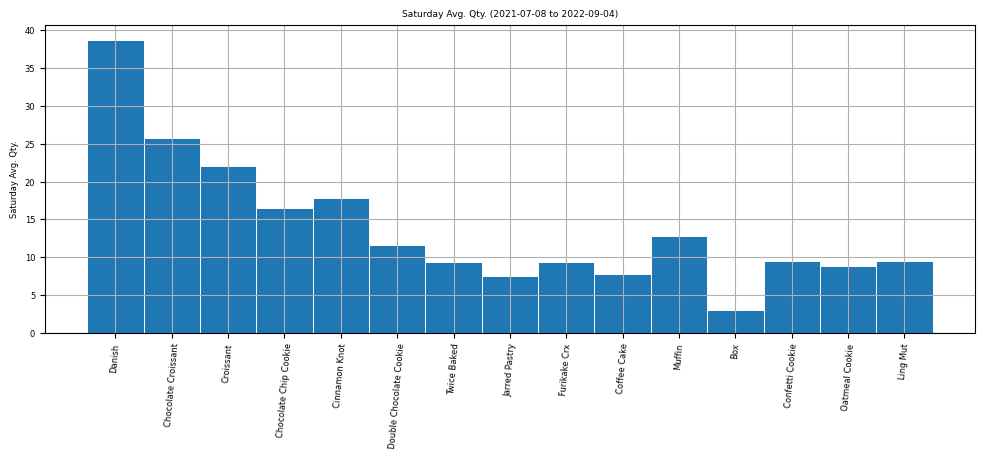

In [74]:
df_dow = df[['DOW', 'Item', 'Date', 'Qty', 'Gross Sales']]
df_dow
df_dow_g = df_dow.groupby(['DOW', 'Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_6 =df_dow_g.loc[6]
# df_6
df_6.columns = df_6.columns.droplevel(1)  # drop sum in column index
# df_6.index = df_6.index.droplevel(0)  # drop DOW in row index
df_6 = df_6.groupby(['Item']).agg({'Date':['sum'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_6.columns = df_6.columns.droplevel(1)  # drop sum in column index
df_6['Avg_Sales_per_day'] = df_6['Gross Sales'] / df_6['Date'] 
df_6['Avg_Qty_per_day'] = df_6['Qty'] / df_6['Date'] 
df_6 = df_6.sort_values(by=['Gross Sales'], ascending=False)
df_6 = df_6.head(15)
df_6

_xlabel = ''
_ylabel = f'Saturday Avg. Qty.'
_title = f'Saturday Avg. Qty.' + date_str

# data
x = df_6.index
y = df_6['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
#        ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)


# x_tick = ax.xaxis.set_major_locator(x.MonthLocator(interval=1))
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# ax.set_xticks(x_tick)
plt.xticks(rotation = 85)

# ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = (12, 4)

# plt.xlim(50, 90)
plt.grid(True)
plt.show()

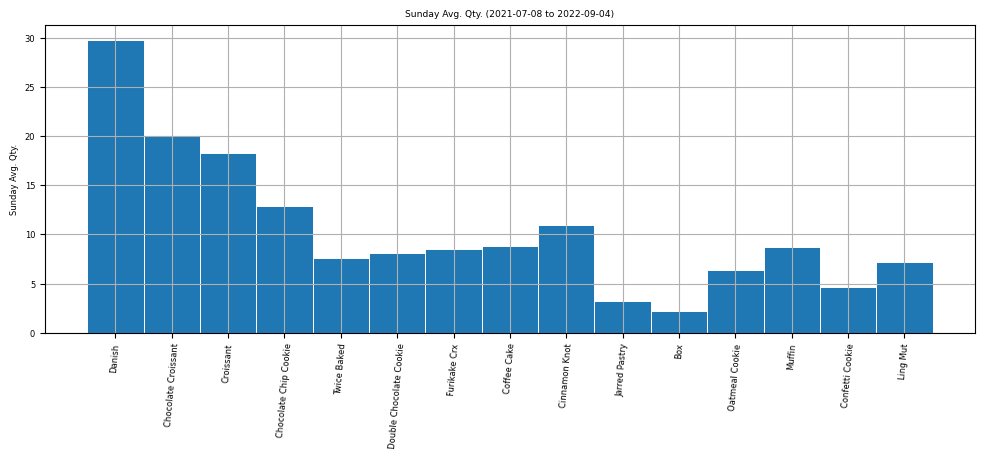

In [75]:
df_dow = df[['DOW', 'Item', 'Date', 'Qty', 'Gross Sales']]
df_dow
df_dow_g = df_dow.groupby(['DOW', 'Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_0 =df_dow_g.loc[0]
# df_0
df_0.columns = df_0.columns.droplevel(1)  # drop sum in column index
# df_0.index = df_0.index.droplevel(0)  # drop DOW in row index
df_0 = df_0.groupby(['Item']).agg({'Date':['sum'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_0.columns = df_0.columns.droplevel(1)  # drop sum in column index
df_0['Avg_Sales_per_day'] = df_0['Gross Sales'] / df_0['Date'] 
df_0['Avg_Qty_per_day'] = df_0['Qty'] / df_0['Date'] 
df_0 = df_0.sort_values(by=['Gross Sales'], ascending=False)
df_0 = df_0.head(15)
df_0

_xlabel = ''
_ylabel = f'Sunday Avg. Qty.'
_title = f'Sunday Avg. Qty.' + date_str

# data
x = df_0.index
y = df_0['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
#        ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)


# x_tick = ax.xaxis.set_major_locator(x.MonthLocator(interval=1))
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# ax.set_xticks(x_tick)
plt.xticks(rotation = 85)

# ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = (12, 4)

# plt.xlim(50, 90)
plt.grid(True)
plt.show()